In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import random as rn
import glob
from losses import bce_dice_loss, dice_coeff
from skimage.transform import resize
import numpy as np
from keras.models import Sequential
from keras.models import Model
from keras.optimizers import RMSprop
import cv2
from tqdm import tqdm

import os
from safeuav import get_unet_MDCB_with_deconv_layers

In [3]:
original_width = 4096
original_height = 2160
NUM_CLASSES = 12
FACTOR = 2
input_width = int(original_width / FACTOR)
input_height = int(original_height / FACTOR)
modelInit = None
modelInit = get_unet_MDCB_with_deconv_layers(input_shape=(input_height, input_width, 3), init_nb=24, lr=0.0001, num_classes=NUM_CLASSES)
WEIGHTS_PATH = './ruralscapes-nn-main/weights/safeuav/segprop_interp_all_standard_augmentation/without_denoise/EPOCH_18_TRAIN_loss_0.03984_dice_0.9727_VALID_loss_0.24240_dice_0.8683.hdf5'

modelInit.load_weights(WEIGHTS_PATH)

# modelInit.summary()
# print('=================')
modelInit._layers.pop()
# modelInit.summary()
modelInit.trainable = False

model = Sequential()
model.add(modelInit)
model.add(layers.Conv2D(4, (1, 1), activation='sigmoid'))
model.trainable = False

# model.add(layers.Dense(4, activation = 'sigmoid'))
model.compile(optimizer=RMSprop(lr=0.0001), loss=bce_dice_loss, metrics=[dice_coeff])
model.load_weights('good_boy_model_with_pop.hdf5')
# model.get_weights()
# model = keras.models.load_model('good_model', compile=False, custom_objects={'optimizer':RMSprop(lr=0.01), 'loss':bce_dice_loss, 'metrics':[dice_coeff]} )

In [4]:
vidcap = cv2.VideoCapture('data/initial_video.mp4')
image = cv2.imread('frame3841.png')
orig_height, orig_width, _ = image.shape
CLASSES_BGR = ((0, 255, 0), (0, 255, 255), (255, 255, 255), (127, 127, 127), (127, 0, 63), (255, 0, 255), (127, 0, 127), (255, 0, 0), (255, 255, 0), (63, 127, 127), (0, 0, 255), (0, 127, 127))
video_res = cv2.VideoWriter('Output.mp4', 0, 1, (orig_width,orig_height))
success,image = vidcap.read()
count = 0
BATCH_SIZE = 2
while success:
    print(count)
    batch_img = []
    for i in range(BATCH_SIZE) :
        success,image = vidcap.read()
        image = cv2.resize(image, (input_width, input_height))
        batch_img.append(image)
        
#     image = cv2.imread('frame3841.png')
#     success,image = vidcap.read()
#     input_img = cv2.resize(image, (input_width, input_height))
#     input_img = np.reshape(input_img,(1,input_height,input_width,3))
#     preds = model.predict_on_batch(input_img)
    preds = model.predict_on_batch(np.array(batch_img) / 255)

#     output_image = np.zeros((input_height, input_width, 3), dtype=np.uint8)
#     for idx, pred in enumerate(preds):
#         _,_,num_classes = pred.shape
#         output_label = cv2.resize(pred, (input_width, input_height))
#         label_indices = output_label.argmax(axis=2)

#         for current_prediction_idx in range(NUM_CLASSES):
#             output_image[np.nonzero(np.equal(label_indices,current_prediction_idx))] = CLASSES_BGR[current_prediction_idx]

#         output_image_res = cv2.resize(output_image, (orig_width, orig_height))
#         alpha = 0.4
#         cv2.addWeighted(output_image_res, alpha, image, 1 - alpha, 0, output_image_res)
#     #     output_image_res = cv2.cvtColor(output_image_res, cv2.COLOR_BGR2RGB)
#         video_res.write(output_image_res)
#     print(count/30)
    count += 1
video.release()

0
1
2
3
4
5
6


KeyboardInterrupt: 

0.0


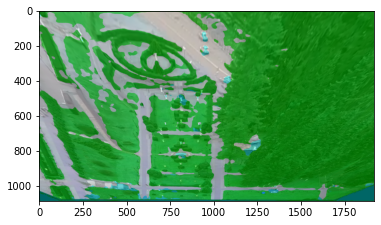

In [6]:
vidcap = cv2.VideoCapture('data/initial_video.mp4')
CLASSES_BGR = ((0, 255, 0), (0, 255, 255), (255, 255, 255), (127, 127, 127), (127, 0, 63), (255, 0, 255), (127, 0, 127), (255, 0, 0), (255, 255, 0), (63, 127, 127), (0, 0, 255), (0, 127, 127))
success,image = vidcap.read()
orig_height, orig_width, _ = image.shape
count = 0
while success:
    success,image = vidcap.read()
    image = cv2.imread('bird.png')
#     image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#     success,image = vidcap.read()
    input_img = cv2.resize(image, (input_width, input_height))
    input_img = np.reshape(input_img,(1,input_height,input_width,3))
    preds = model.predict_on_batch(input_img/255)
#     print(preds)
    output_image = np.zeros((input_height, input_width, 3), dtype=np.uint8)
    for idx, pred in enumerate(preds):
        _,_,num_classes = pred.shape
        output_label = cv2.resize(pred, (input_width, input_height))
        label_indices = output_label.argmax(axis=2)

        for current_prediction_idx in range(NUM_CLASSES):
            output_image[np.nonzero(np.equal(label_indices,current_prediction_idx))] = CLASSES_BGR[current_prediction_idx]

        output_image_res = cv2.resize(output_image, (orig_width, orig_height))
        alpha = 0.4
        cv2.addWeighted(output_image_res, alpha, image, 1 - alpha, 0, output_image_res)
#         output_image_res = cv2.cvtColor(output_image_res, cv2.COLOR_BGR2RGB)
    plt.imshow(output_image_res)
    cv2.imwrite('res.png', output_image_res)
    print(count/30)
    count += 1
    break

In [9]:
vidcap = cv2.VideoCapture('Output_depth.mp4')
success = True
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_res = cv2.VideoWriter('Output_depth_bun.mp4', fourcc, 30,  (1920,1088))
while success:
    success,image = vidcap.read()
    video_res.write(image)
video_res.release()



# fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# video_res = cv2.VideoWriter('Output_original.mp4', fourcc, 30,  (1920,1088))
# files = sorted(glob.glob('./data/All_frames/*.png'))
# # files = files[0:3]
# for file in files:
#     img = cv2.imread(file)
#     video_res.write(img)
# video_res.release()
